In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
data1 = load_iris()

In [3]:
data1.target[[10, 25, 50]]

array([0, 0, 1])

In [4]:
list(data1.target_names)

['setosa', 'versicolor', 'virginica']

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [5]:
df = pd.DataFrame(data=np.c_[data1['data'], data1['target']], 
             columns = data1['feature_names'] + ['target'])

In [6]:
df.head(25)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Provides basic statistical details including the mean, percentile, quartiles, standard deviation, count, minimum, and maximum values of the data set.

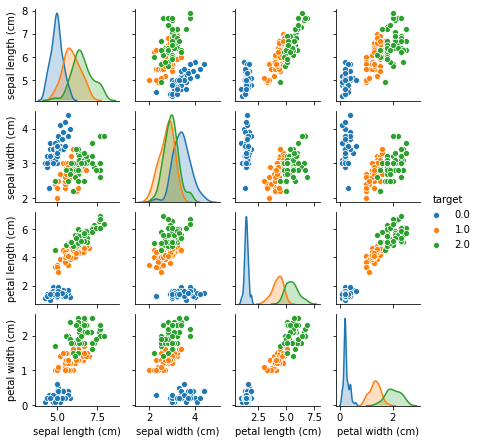

In [8]:
sns.pairplot(df, hue = 'target', height = 1.5)

I implemented the pairplot as I wanted to see how the data was distributed. The pairplot plots pairwise relationships in a dataset and displays a grid of axes so each variable in the data frame is shown with respect to the y-axis and x-axis. In this case, the targets represent different flower species. The pairplot is useful here because there are few features. This would not be as effective for a high dimensional data set (that employs various types of features). 

<AxesSubplot:ylabel='Frequency'>

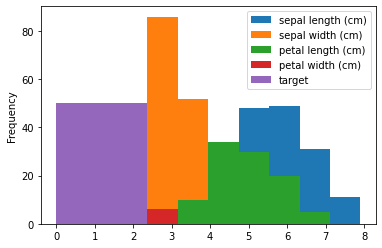

In [9]:
df.plot(kind="hist")

In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [11]:
# Separate the dependent and independent features
X = df[['sepal length (cm)','sepal width (cm)',
           'petal length (cm)', 'petal width (cm)']]
y = df['target']
# target variable is just the y or the output variable

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Standardization is the process of shifting the distribution of each attribute to have a mean of zero and a St. Dev. of one. This is a helpful method for attributes for a model because Standardization of datasets is performed before many machine learning estimators implemented in scikit-learn. If this is not done, they may behave badly as the individual features "do not more or less look like standard normally distributed data."

### Linear Support Vector Machine

In [14]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC(kernel = 'linear') #Default hyperparameters
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test, y_pred))

Accuracy Score:
1.0


In [15]:
# RMSE determines root mean square deviation
# common metric for evaluating quality of predictions & shows how far predictions fall from
# true measured values (when we apply Euc. dist.)
from sklearn.metrics import mean_squared_error

# Compute MSE using MSE ^ (1/2)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Calculate the root mean squared error
# Computes the mean of the distances b/w the actual values and the predicted values
# Highlights the importance of some of the errors

from math import sqrt
rmse = sqrt(mse)
print("RMSE: ", round((rmse), 3))

Mean Squared Error:  0.0
RMSE:  0.0


In [16]:
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'rbf')
# radial basis function kernel
# computes squared euclidean distance b/w 2 feature vectors
score = cross_val_score(svc, X, y, cv = 10, scoring = 'accuracy')
print(score)

[1.         0.93333333 1.         0.93333333 1.         0.93333333
 0.86666667 1.         1.         1.        ]


In [17]:
print(score.mean())

0.9666666666666666


In [18]:
# Tune SVM hyperparameters by using GridSearchCV with cross validation.
from sklearn.model_selection import GridSearchCV

In [19]:
# Now I create a dictionary to pass the values into the GridSearchCV 
# this is necessary for the param_grid parameter
# tuning helps us find the best parameter that gives us the best possible score
param_list = {"C": [1, 5, 10, 20, 50, 100],
             "gamma": [10, 1, 0.1, 0.01, 0.0001]
}

In [20]:
grid = GridSearchCV(SVC(), param_list, refit = True, verbose = 5)
# verbose = 5 which >3 as the fold & candidate parameter indices are shown together w/
# original begin time of the computation

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9)
knn = KNeighborsClassifier()

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
kvals = list(range(1, 100))
# supplies values into key value pairs for the requred dictionary
# that serves as an input for param_grid

In [24]:
pgrd = dict(n_neighbors = kvals)

In [25]:
rand = RandomizedSearchCV(knn, pgrd, cv = 10, scoring = 'accuracy',
                          n_iter = 10, random_state = 5)
rand.fit(X, y)

# displays the settings of the parameters that have been selected

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...]},
                   random_state=5, scoring='accuracy')

In [26]:
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...]},
                   random_state=5, scoring='accuracy')

In [27]:
rand.cv_results_

{'mean_fit_time': array([0.00168598, 0.0016547 , 0.00156868, 0.00157828, 0.00148218,
        0.00163786, 0.00157528, 0.00156729, 0.00165873, 0.00157447]),
 'std_fit_time': array([3.12917373e-04, 2.93509889e-04, 4.91118257e-05, 7.28140489e-05,
        9.91925620e-05, 2.39732580e-04, 1.72642474e-04, 1.53137872e-04,
        2.00103956e-04, 7.42841896e-05]),
 'mean_score_time': array([0.00198383, 0.00189593, 0.0018343 , 0.00183675, 0.00182009,
        0.0019325 , 0.0017972 , 0.00182407, 0.00195484, 0.00185659]),
 'std_score_time': array([3.47823255e-04, 1.98832646e-04, 4.28695169e-05, 1.14774637e-04,
        1.28992428e-04, 3.16070140e-04, 1.85262221e-04, 1.42750944e-04,
        3.21718250e-04, 8.64851327e-05]),
 'param_n_neighbors': masked_array(data=[67, 33, 47, 29, 75, 24, 11, 21, 18, 36],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 67},
  {'

In [28]:
print("The accuracy of the KNN model is as follows: ", rand.best_score_)
print(rand.best_params_)

The accuracy of the KNN model is as follows:  0.9666666666666666
{'n_neighbors': 29}
